In [48]:
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt

In [39]:
url = './/adult.data'  
df = pd.read_csv(url, header=None, sep=", ")
df

/home/rammi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# 1.  How many males and females are there?

In [13]:
df.groupby(9)[0].count()

9
 Female    10771
 Male      21790
Name: 0, dtype: int64

In [14]:
# 2.  What is the mean male age?

In [40]:
df[df[9] == "Male"][0].mean()

39.43354749885268

In [41]:
# 3.  What is the proportion of the US citizens?

In [45]:
df[df[13] == "United-States"][0].count() / df[0].count()

0.895857006848684

In [46]:
# 4.  Plot the distribution of people’s education as a bar plot.

dict_keys(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college'])


<IPython.core.display.Javascript object>


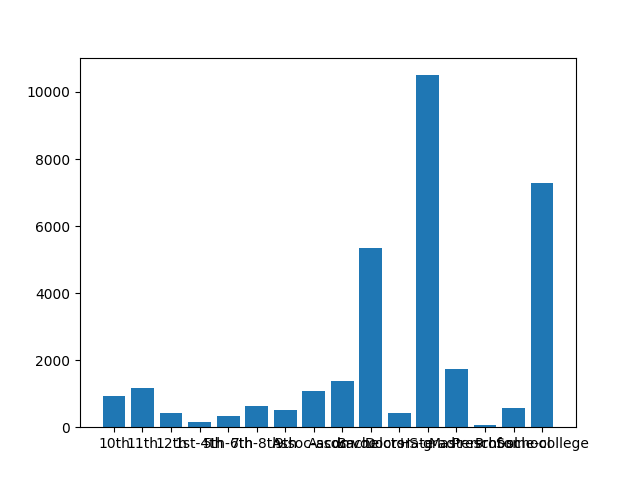

<BarContainer object of 16 artists>

In [66]:
print(df.groupby(3).groups.keys())
plt.bar(df.groupby(3).groups.keys(), df.groupby(3)[0].count())

In [67]:
# 5.  What is the mean and standard deviation of the ”final weight” for divorced people?

In [72]:
df[df[5] == "Divorced"][2].describe()[["mean", "std"]]

mean    185802.790457
std     105646.789459
Name: 2, dtype: float64

In [73]:
# 6.  Is it true that the people who receive over 50k are mostly highly educated?

# Yes

In [79]:
df[df[14].str[0] == ">"].groupby(3)[14].count() 

3
10th              62
11th              60
12th              33
1st-4th            6
5th-6th           16
7th-8th           40
9th               27
Assoc-acdm       265
Assoc-voc        361
Bachelors       2221
Doctorate        306
HS-grad         1675
Masters          959
Prof-school      423
Some-college    1387
Name: 14, dtype: int64

In [80]:
# 7.  What is the maximum male and female age for each race?

In [82]:
df.groupby([8, 9])[0].describe()["max"]

8                   9     
Amer-Indian-Eskimo  Female    80.0
                    Male      82.0
Asian-Pac-Islander  Female    75.0
                    Male      90.0
Black               Female    90.0
                    Male      90.0
Other               Female    74.0
                    Male      77.0
White               Female    90.0
                    Male      90.0
Name: max, dtype: float64

In [83]:
# 8.  The people from which countries work as farmers/fishers?

In [106]:
df[df[6].str.match("Farming-fishing")].groupby(13)[0].count()

13
?                  5
Cambodia           1
Canada             2
Cuba               2
El-Salvador        2
England            1
France             1
Germany            1
Guatemala          4
Hong               1
Ireland            1
Italy              2
Japan              1
Mexico            77
Philippines        4
Poland             1
Portugal           1
Puerto-Rico        5
United-States    879
Vietnam            2
Yugoslavia         1
Name: 0, dtype: int64

In [90]:
# 9.  Consider  the  ratio  of  the  number  of  1)  male  bachelors  to  male  masters,  and  2)  female bachelors to female masters.  Which one is higher?

# Male higher

In [109]:
(df[df[3].str.match("Bachelors")].groupby(9)[0].count() / df[df[3].str.match("Master")].groupby(9)[0].count())

9
Female    3.020522
Male      3.147430
Name: 0, dtype: float64

In [110]:
# 10.  What is the largest number of hours a person works a week?  How many people who workthis number of hours are there?  What is their income?

In [113]:
max_work_hours = df[12].max()
max_work_hours

99

In [114]:
df[df[12] == max_work_hours][0].count()

85

In [115]:
df[df[12] == max_work_hours].groupby(14)[0].count()

14
<=50K    60
>50K     25
Name: 0, dtype: int64